# L1 Regularization (Lasso Regularization)

## 1. Basic Idea

L1 regularization adds a penalty equal to the **absolute value of the weights** 
to the loss function.

It is mainly used to:

- Prevent overfitting
- Perform feature selection
- Create sparse models

---

## 2. Linear Regression without Regularization

The standard Mean Squared Error (MSE) loss is:

$$
J(w) = \frac{1}{n} \sum_{i=1}^{n} (y_i - x_i^T w)^2
$$

where:

- $x_i$ is the input vector
- $w$ is the weight vector
- $y_i$ is the true output
- $n$ is the number of samples

---

## 3. Linear Regression with L1 Regularization

L1 adds the sum of absolute values of weights:

$$
J(w) = \frac{1}{n} \sum_{i=1}^{n} (y_i - x_i^T w)^2 + \lambda \sum_{j=1}^{d} |w_j|
$$

where:

- $\lambda \ge 0$ is the regularization parameter
- $d$ is the number of features
- $|w_j|$ is the absolute value of weight $j$

---

## 4. Vector Form

Using L1 norm notation:

$$
J(w) = \frac{1}{n} \|y - Xw\|_2^2 + \lambda \|w\|_1
$$

where:

$$
\|w\|_1 = \sum_{j=1}^{d} |w_j|
$$

---

## 5. Why L1 Creates Sparsity

The absolute value function:

$$
|w|
$$

has a sharp corner at 0.

Because of this:

- The gradient pushes many weights exactly to zero.
- Some features get completely removed.
- This is why L1 is used for **feature selection**.

---

## 6. Comparison with L2 Regularization

L2 penalty:

$$
\lambda \sum_{j=1}^{d} w_j^2
$$

Key difference:

- L1 → produces sparse weights (many zeros)
- L2 → shrinks weights but rarely makes them exactly zero

---

## 7. Geometric Interpretation

The constraint form of L1:

$$
\min_w \|y - Xw\|_2^2
\quad \text{subject to} \quad
\|w\|_1 \le t
$$

The L1 constraint region forms a diamond shape in 2D.

The sharp corners increase the chance that the solution lies on an axis,
making some weights exactly zero.

---

## 8. In Logistic Regression

L1 regularized logistic loss:

$$
J(w) =
- \frac{1}{n} \sum_{i=1}^{n}
\left[
y_i \log(\hat{y}_i) +
(1 - y_i)\log(1 - \hat{y}_i)
\right]
+ \lambda \|w\|_1
$$

where:

$$
\hat{y}_i = \sigma(w^T x_i)
$$

and

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$


# L1 Regularization using Real Dataset (Diabetes Dataset)

In this example, we use the **Diabetes dataset** from `sklearn`.

### Goal
Predict disease progression using multiple medical features.

We will:

1. Load a real dataset  
2. Split into train and test sets  
3. Apply L1 regularization (Lasso)  
4. Observe sparsity in coefficients  
5. Analyze model performance  

---

## 1. Dataset Information

Let the feature matrix be:

$$
X \in \mathbb{R}^{n \times d}
$$

where:

- $n$ = number of samples  
- $d$ = number of features (here $d = 10$)

The target vector is:

$$
y \in \mathbb{R}^{n}
$$

So this is a **supervised regression problem**.

---

## 2. Model Objective (L1 Regularized Regression)

We minimize the following objective function:

$$
J(w) = \frac{1}{n} \| y - Xw \|_2^2 + \lambda \| w \|_1
$$

### Where:

- $w \in \mathbb{R}^d$ → weight vector  
- $\| y - Xw \|_2^2$ → squared error term  
- $\| w \|_1$ → L1 norm of weights  
- $\lambda \ge 0$ → regularization strength  

---

## 3. L1 Norm Definition

The L1 norm is defined as:

$$
\| w \|_1 = \sum_{j=1}^{d} |w_j|
$$

This term penalizes the absolute magnitude of weights.

---

## 4. Understanding Each Term

### (1) Data Fitting Term

$$
\frac{1}{n} \| y - Xw \|_2^2
$$

This ensures the model fits the training data well.

---

### (2) Regularization Term

$$
\lambda \| w \|_1
$$

This enforces sparsity:

- Larger $\lambda$ → stronger penalty  
- More coefficients shrink to zero  
- Model becomes simpler  

---

## 5. Expected Behavior

As $\lambda$ increases:

- Some coefficients become exactly zero  
- Irrelevant features are removed  
- Model complexity decreases  
- Bias increases, variance decreases  

This demonstrates the **bias–variance tradeoff**.

---

## 6. Why L1 Produces Sparsity

The absolute value function:

$$
|w|
$$

has a sharp corner at zero.

Because of this non-differentiability:

- Optimization can push weights exactly to zero  
- Automatic feature selection happens  

---

## 7. Practical Expectation in This Dataset

From correlation analysis:

- Features like **bmi, s5, bp** are likely important  
- Weak features may shrink to zero  

After training Lasso, we should observe:

- Several coefficients = 0  
- Important medical features retained  


First 5 rows of dataset:



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0



Dataset Shape: (442, 11)

Summary Statistics:



,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.268604e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000



Missing Values in Each Column:

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


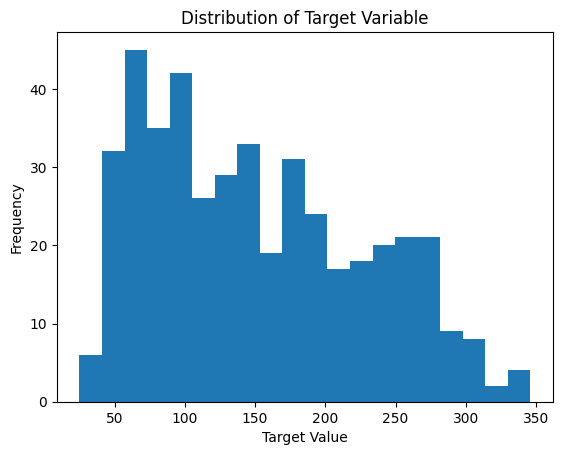


Correlation of Features with Target:

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex       0.043062
s3       -0.394789
Name: target, dtype: float64


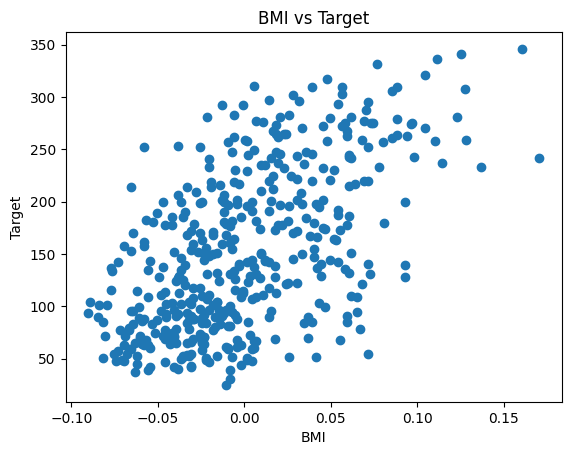

In [2]:
# ===============================
# Step 1: Import Required Libraries
# ===============================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_diabetes

# ===============================
# Step 2: Load Dataset
# ===============================

diabetes = load_diabetes()

X = diabetes.data
y = diabetes.target
feature_names = diabetes.feature_names

# Convert to DataFrame for easier EDA
df = pd.DataFrame(X, columns=feature_names)
df["target"] = y

# ===============================
# Step 3: Basic Information
# ===============================

print("First 5 rows of dataset:\n")
display(df.head())

print("\nDataset Shape:", df.shape)

print("\nSummary Statistics:\n")
display(df.describe())

print("\nMissing Values in Each Column:\n")
print(df.isnull().sum())


# ===============================
# Step 4: Distribution of Target Variable
# ===============================

plt.figure()
plt.hist(df["target"], bins=20)
plt.title("Distribution of Target Variable")
plt.xlabel("Target Value")
plt.ylabel("Frequency")
plt.show()


# ===============================
# Step 5: Correlation with Target
# ===============================

correlation = df.corr()["target"].sort_values(ascending=False)

print("\nCorrelation of Features with Target:\n")
print(correlation)


# ===============================
# Step 6: Example Feature vs Target Scatter Plot
# ===============================

plt.figure()
plt.scatter(df["bmi"], df["target"])
plt.title("BMI vs Target")
plt.xlabel("BMI")
plt.ylabel("Target")
plt.show()
